In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [5]:
tickers = ['BBDC4.SA', 'ABEV3.SA','PETR4.SA', 'ELET3.SA']

portifolio = pd.DataFrame();
for t in tickers:
    portifolio[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [7]:
portifolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3047 entries, 2008-01-02 to 2020-07-20
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BBDC4.SA  3047 non-null   float64
 1   ABEV3.SA  3045 non-null   float64
 2   PETR4.SA  3018 non-null   float64
 3   ELET3.SA  3046 non-null   float64
dtypes: float64(4)
memory usage: 119.0 KB


In [8]:
portifolio.head()

,BBDC4.SA,ABEV3.SA,PETR4.SA,ELET3.SA
Date,,,,
2008-01-02,12.502825,0.885113,34.516708,15.150639
2008-01-03,12.255054,0.888351,33.961281,15.020571
2008-01-04,12.111085,0.877054,32.294937,14.864537
2008-01-07,12.335369,0.856329,31.346725,15.053103
2008-01-08,12.524208,0.869931,33.068596,15.066117


# Normalizando para a base 100

*P1/P0 * 100 * Isso faz com o que todos iniciem da base de 100

In [9]:
portifolio.iloc[0]

BBDC4.SA    12.502825
ABEV3.SA     0.885113
PETR4.SA    34.516708
ELET3.SA    15.150639
Name: 2008-01-02 00:00:00, dtype: float64

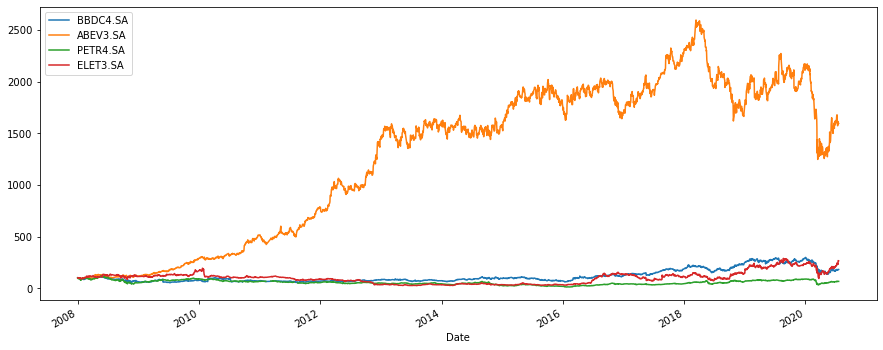

In [11]:
(portifolio / portifolio.iloc[0] * 100).plot(figsize =(15,6))
plt.show()

In [12]:
portifolio.loc['2008-01-02']

BBDC4.SA    12.502825
ABEV3.SA     0.885113
PETR4.SA    34.516708
ELET3.SA    15.150639
Name: 2008-01-02 00:00:00, dtype: float64

In [13]:
portifolio.iloc[0]

BBDC4.SA    12.502825
ABEV3.SA     0.885113
PETR4.SA    34.516708
ELET3.SA    15.150639
Name: 2008-01-02 00:00:00, dtype: float64

# Calculando o retorno simples do portifolio

In [14]:
retornos = (portifolio / portifolio.shift(1)) - 1

retornos.head()

,BBDC4.SA,ABEV3.SA,PETR4.SA,ELET3.SA
Date,,,,
2008-01-02,NaN,NaN,NaN,NaN
2008-01-03,-0.019817,0.003658,-0.016092,-0.008585
2008-01-04,-0.011748,-0.012718,-0.049066,-0.010388
2008-01-07,0.018519,-0.023630,-0.029361,0.012686
2008-01-08,0.015309,0.015883,0.054930,0.000865


In [16]:
pesos = np.array([.25,.25,.25,.25])

## Multiplicando pesos e retornos

*dot* faz a multiplicação das matrizes

In [18]:
np.dot(retornos, pesos)

array([            nan, -1.02088068e-02, -2.09798533e-02, ...,
       -1.95565443e-02,  3.86021827e-02, -4.53638386e-05])

In [19]:
retorno_anual = retornos.mean() * 250
retorno_anual

BBDC4.SA    0.141473
ABEV3.SA    0.274330
PETR4.SA    0.081013
ELET3.SA    0.217681
dtype: float64

In [20]:
np.dot(retorno_anual, pesos)

0.17862418813923497

In [25]:
portifolio_1 = str(round(np.dot(retorno_anual, pesos), 4) * 100)+ ' %'
print(portifolio_1)

17.86 %


In [35]:
pesos_2 = np.array([.2,.4,.1,.3])

In [36]:
portifolio_2 = str(round(np.dot(retorno_anual, pesos_2), 5) * 100) + ' %'

print(portifolio_1)
print(portifolio_2)

17.86 %
21.143 %
